In [1]:
#Import pandas
import pandas as pd

In [4]:
#Memuat data
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Variabel fitur
x=df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
#Variabel sasaran
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
from sklearn.tree import DecisionTreeClassifier #import pengklasifikasi pohon keputusan
from sklearn.model_selection import train_test_split #import fungsi train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [10]:
#Membuat objek classifer pohon keputusan
model = DecisionTreeClassifier()

#Melatih pengklasifikasi pohon keputusan
model = model.fit(x_train,y_train)

#Memprediksi respons untuk kumpulan data pengujian
y_pred = model.predict(x_test)

In [11]:
#Evaluasi menggunakan akurasi
from sklearn import  metrics #import metrik scikit-learn untuk perhitungan akurasi
print ("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy :  67.53246753246754


In [12]:
#Evaluasi menggunakan matriks confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[73, 26],
       [24, 31]])

In [13]:
#Mencetak print akurasi
print ("Accuracy : ",((82+27)/154))

Accuracy :  0.7077922077922078


In [14]:
#Evaluasi menggunakan laporan klasifikasi
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74        99
           1       0.54      0.56      0.55        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



In [54]:
#checking prediction value
model.predict([[6,148,72,35,0,33.6,0.627,50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [15]:
#import modul untuk memvisualisasikan pohon keputusan
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [16]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

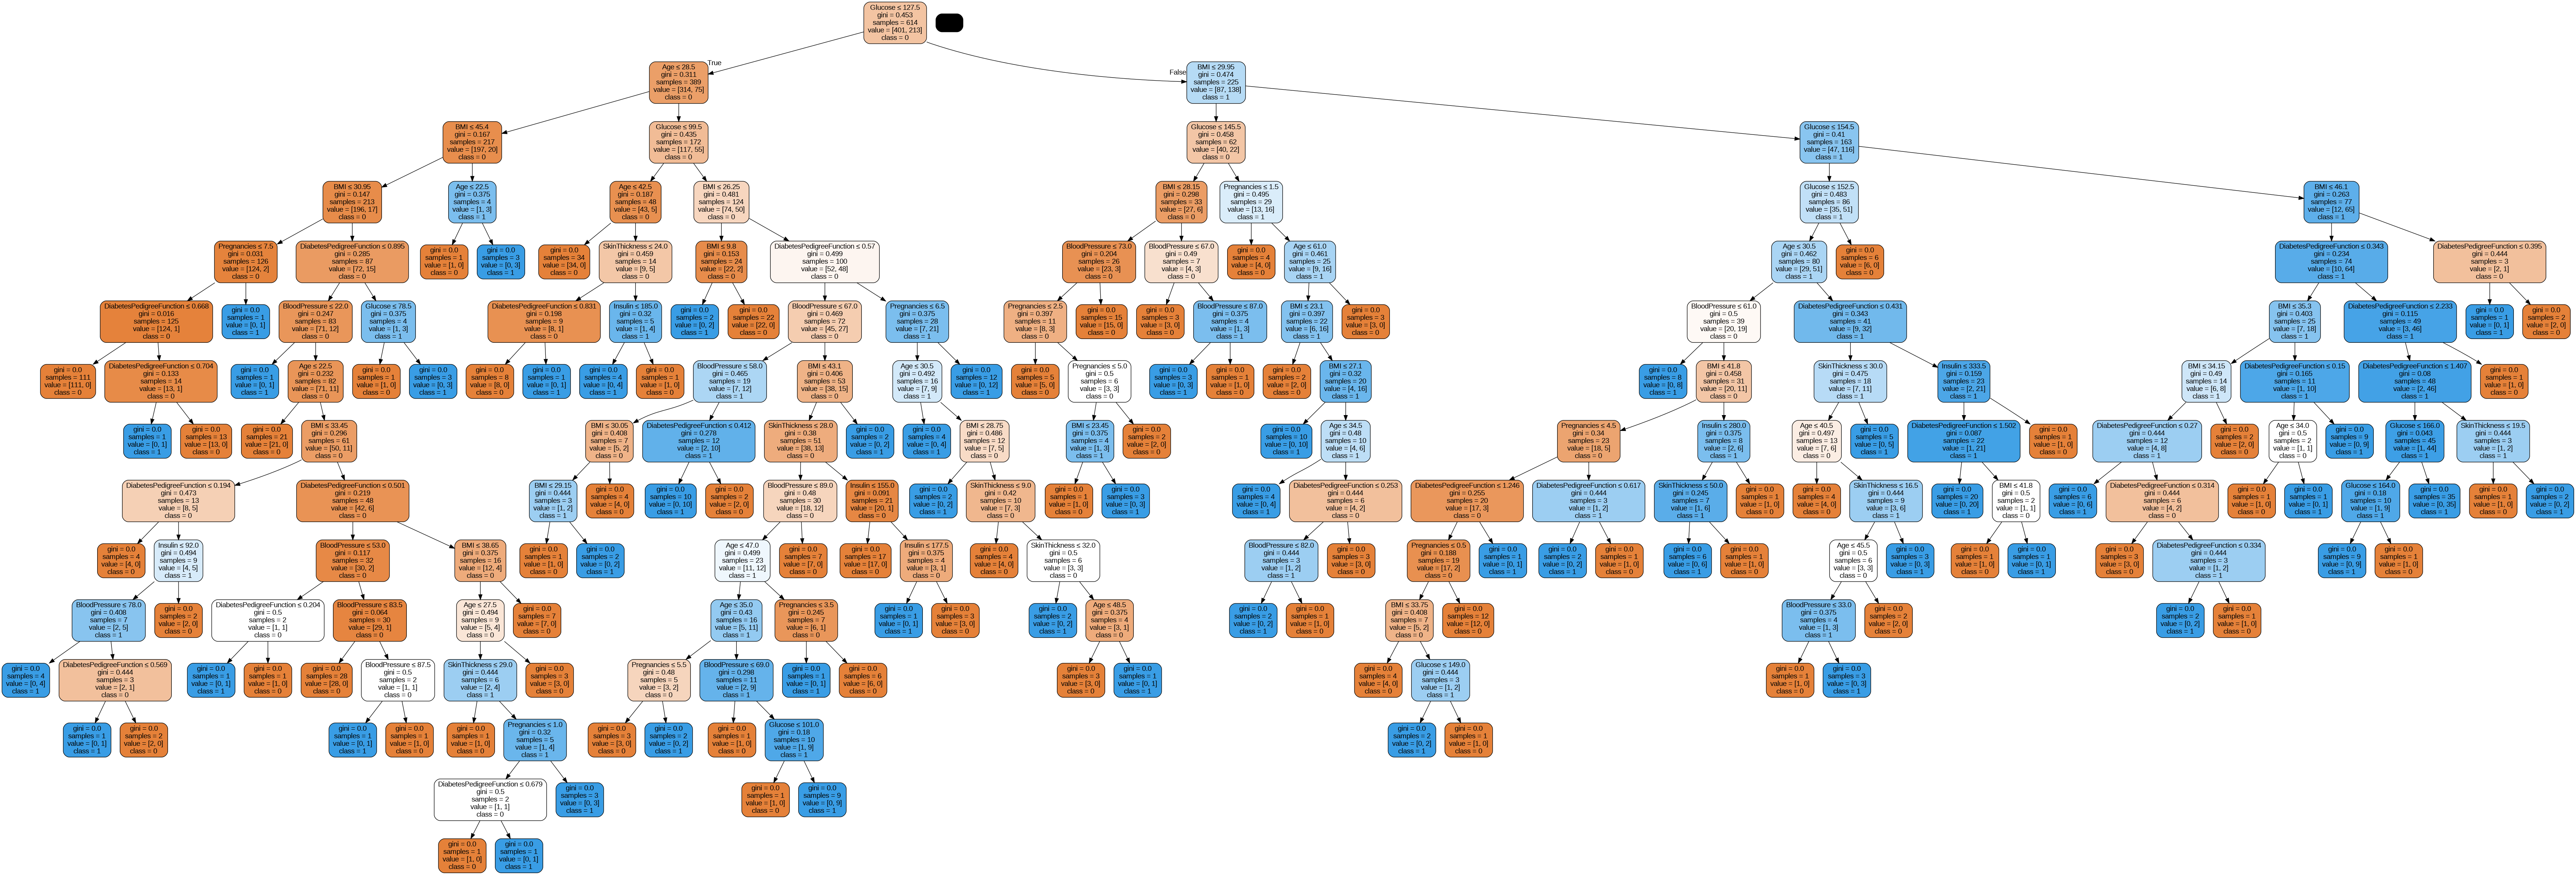

In [17]:
from IPython.core.formatters import StringIO
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True, special_characters=True, feature_names=features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [18]:
# Membuat objek classifer pohon keputusan
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Melatih pengklasifikasi pohon keputusan
model = model.fit(x_train,y_train)

#Memprediksi respons untuk kumpulan data pengujian
y_pred = model.predict(x_test)

# Model akurasi
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


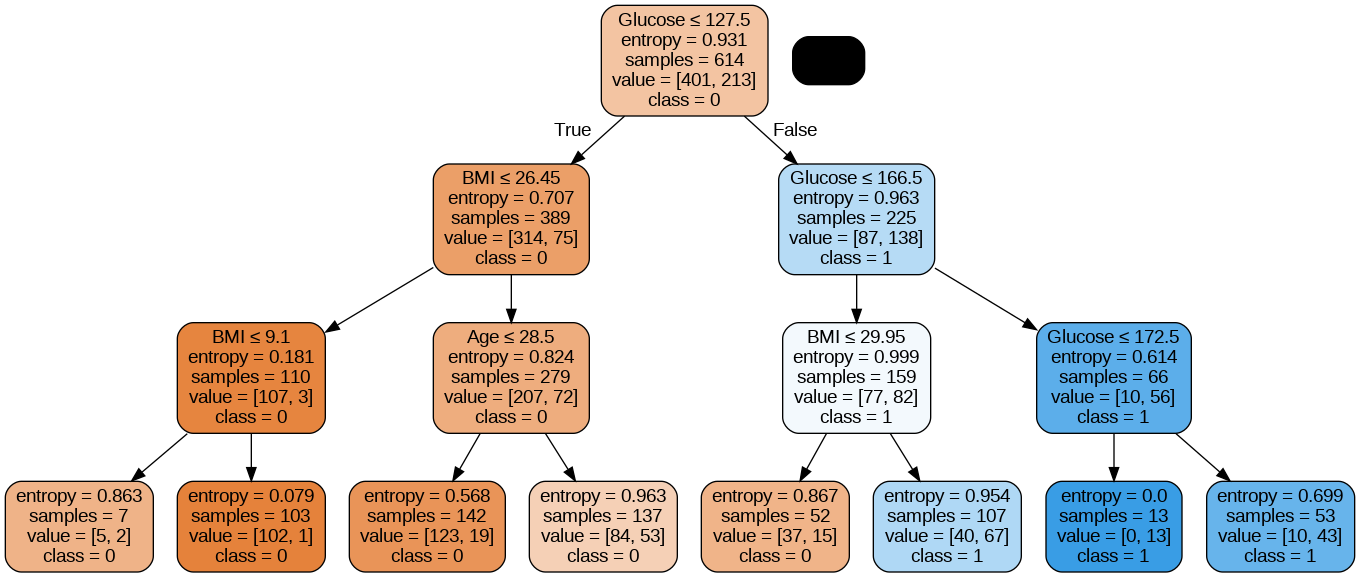

In [19]:
#Memvisualisasikan pohon turunan yang lebih baik
from IPython.core.formatters import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_set.png')
Image(graph.create_png())